In [ ]:
!pip install pygad
import pygad
import numpy as np
from mpmath import fp, hyp2f1
from numpy.linalg import norm
from numpy.random import rand
from numpy import array, inf, vectorize, repeat, power
from numpy import sum as np_sum
import time
from numpy import abs as np_abs
import time

In [ ]:
def param_to_spec(param):
    _A = param[::2]
    _B = param[1::2]
    output = array([(_A+spins)/2, (_A-spins)/2, _B]).transpose().flatten()
    return output

def g(h, hb, z, zb):
    h12 = 0
    h34 = 0
    hb12 = 0
    hb34 = 0
    output = (1/2 if h == hb else 1)*(z**h*zb**hb*(hyp2f1(h-h12, h+h34, 2*h, z))*(hyp2f1(hb-hb12, hb+hb34, 2*hb, zb)) +
                                    zb**h*z**hb*(hyp2f1(h-h12, h+h34, 2*h, zb))*(hyp2f1(hb-hb12, hb+hb34, 2*hb, z)))
    return fp.mpc(output)


def p(h, hb, c, z, zb):
    output = c*(power(((z-1)*(zb-1)),1/8)*g(h,hb,z,zb) - power(z,1/8)*power(zb,1/8)*g(h,hb,1-z,1-zb))
    return output
pts = rand(29,2)

vec_p = vectorize(p, excluded=['z', 'zb'])

def e(spec, pts):
    output=array([(np_sum(vec_p(spec[::3], spec[1::3], spec[2::3], z[0], z[1])) +
                  ((z[0]-1)*(z[1]-1))**(1/8)-z[0]**(1/8)*z[1]**(1/8)) for z in pts])
    return output


def e_abs(spec, pts):
    output= np_sum(array([(np_abs(vec_p(spec[::3], spec[1::3], spec[2::3], z[0], z[1])) +
                  np.abs(((z[0]-1)*(z[1]-1))**(1/8)-z[0]**(1/8)*z[1]**(1/8))) for z in pts]))
    return output

def A(spec,pts):
    output = norm(e(spec,pts))/np.sum(e_abs(spec,pts))
    return output

test_spec = array([[2.,2.,2.44e-4],[.5,.5,.25],[2.,0.,.016],[4.,0.,2.2e-4],[6.,0.,1.36e-5]])

spins = array([0,0,2,4,6])

def accuracy_fn(state):
    return A(param_to_spec(state),pts)

def error_fn(state):
    return norm(np.abs(e(param_to_spec(state),pts)))

Generation:10, best fitness:4.168855998525133
Elapsed Time:0h:25m:16s, Estimated to completion 8h, 0m, 14s
Generation:20, best fitness:21.562528767878867
Elapsed Time:0h:47m:14s, Estimated to completion 7h, 5m, 9s
Generation:30, best fitness:50.33212148666936
Elapsed Time:1h:9m:15s, Estimated to completion 6h, 32m, 26s
Generation:40, best fitness:67.83783309491713
Elapsed Time:1h:30m:31s, Estimated to completion 6h, 2m, 6s
Generation:50, best fitness:77.32363523903388
Elapsed Time:1h:51m:28s, Estimated to completion 5h, 34m, 26s
Generation:60, best fitness:99.26647720365183
Elapsed Time:2h:12m:35s, Estimated to completion 5h, 9m, 22s
Generation:70, best fitness:113.6493894594647
Elapsed Time:2h:32m:54s, Estimated to completion 4h, 43m, 59s
Generation:80, best fitness:120.94791921593014
Elapsed Time:2h:53m:20s, Estimated to completion 4h, 20m, 0s
Generation:90, best fitness:124.31288968521928
Elapsed Time:3h:11m:42s, Estimated to completion 3h, 54m, 18s
Generation:100, best fitness:126.

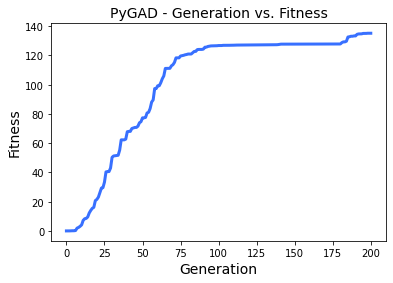

Elapsed time:6h:33m:2011s
Parameters of the best solution : [2.68575280e+00 2.18192054e-03 1.05428312e+00 2.69933206e-01
 1.36685227e+00 6.61739143e-03 3.73318892e+00 1.08051253e-03
 6.49733889e+00 1.50224359e-05]
Fitness value of the best solution = 135.15891404761578
Best solution error: 0.007398698095840761
Best solution accuracy: 0.00023546504267818233


In [ ]:
def fitness(solution, solution_idx):
    for i in range(len(solution)):
        if solution[i]<0 or solution[i]>6.5:
            fitness=0
            return fitness
    fitness=1/error_fn(solution)
    return fitness

fitness_function = fitness

num_generations = 150
num_parents_mating = 30

sol_per_pop = 300
num_genes = 10

init_range_low = 0
init_range_high = 6.5

parent_selection_type = "rank"
keep_parents = 5

crossover_type = "uniform"
crossover_probability=0.3
mutation_type = "random"
mutation_probability = 0.2

initial_pop=[]
for i in range(sol_per_pop):
        initial_pop.append([4., rand(), 1., rand(), 2., rand(), 4., rand(), 6., rand()])

def call(x):
    index=x.generations_completed
    if index%10==0:
        solution, solution_fitness, solution_idx = x.best_solution(ga_instance.last_generation_fitness)
        now=time.time()
        extimated=((now-start)/index)*(num_generations-index)
        h=(now-start)//3600
        m=(now-start-h*3600)//60
        s=(now-start-h*3600-m*60)//1
        he=extimated//3600
        me=(extimated-he*3600)//60
        se=(extimated-he*3600-me*60)//1
        print("""Generation:{}, best fitness:{}, solution error:{},solution accuracy:{}
        """.format(x.generations_completed,solution_fitness, error_fn(solution), accuracy_fn(solution)))
        print('Best solution', solution)
        print('Elapsed Time:{}h:{}m:{}s, Estimated to completion {}h, {}m, {}s'.format(int(h),int(m),int(s), int(he),int(me),int(se)))

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       initial_population=initial_pop,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_probability=mutation_probability,
                       random_mutation_min_val=-0.1,
                       random_mutation_max_val=0.1,
                       on_generation=call)

start = time.time()
ga_instance.run()
end=time.time()
ga_instance.plot_fitness()
h=(end-start)//3600
m=(end-start-h*3600)//60
s=(end-start-h*3600)//1
print('Elapsed time:{}h:{}m:{}s'.format(int(h),int(m), int(s)))
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Best solution error:", error_fn(solution))
print("Best solution accuracy:", accuracy_fn(solution))

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Best solution error:", error_fn(solution))
print("Best solution accuracy:", accuracy_fn(solution))

Parameters of the best solution : [2.68575280e+00 2.18192054e-03 1.05428312e+00 2.69933206e-01
 1.36685227e+00 6.61739143e-03 3.73318892e+00 1.08051253e-03
 6.49733889e+00 1.50224359e-05]
Fitness value of the best solution = 135.15891404761578
Best solution error: 0.007398698095840761
Best solution accuracy: 0.00023546504267818233
